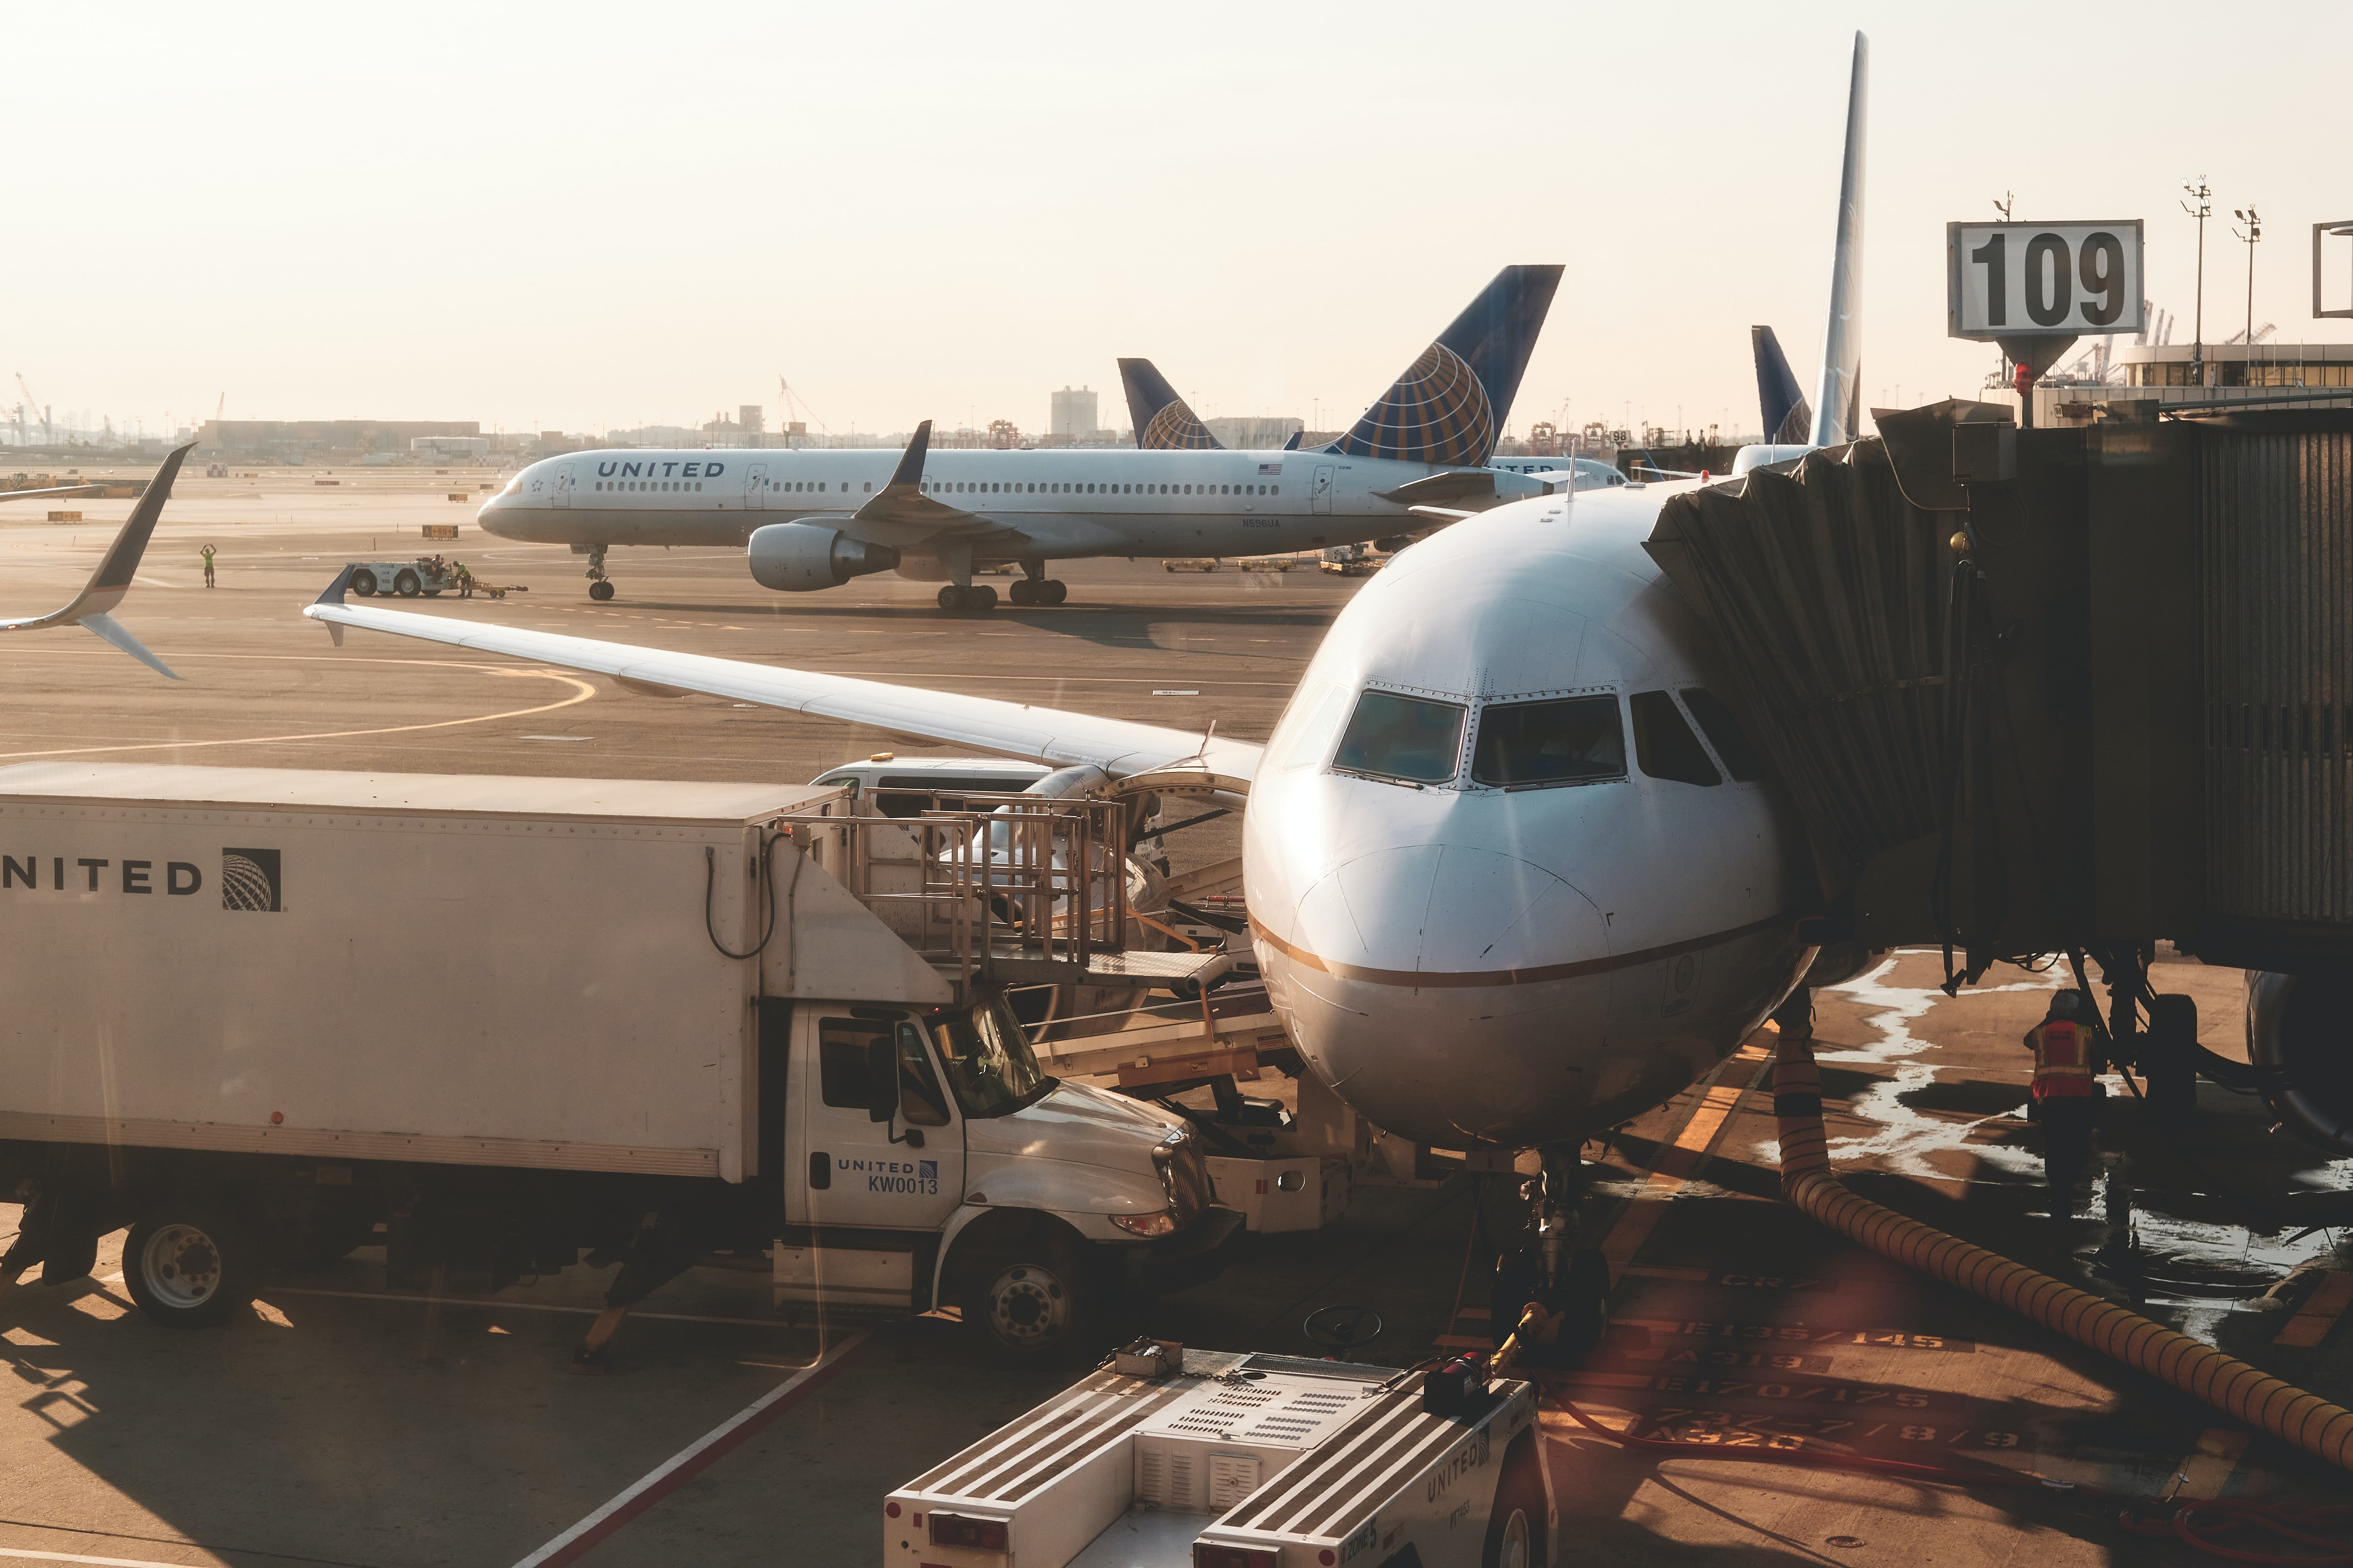

# Capstone Project: Airline Delays

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 13-15, 2023**

Garrett Becker

____
____
## Part 2: Linear and Logistic Regression
____
____

____
## Imports and Setup
____

** Import modules **

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [31]:
df = pd.read_csv('airlines_delay.csv')

In [32]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


** Fix NaN values, if any **

In [33]:
df[df.isna().any(axis=1)]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class


** Make dummy variables for airlines and airports **

In [34]:
airline_labels = ['Airline']
df = pd.get_dummies(df, columns=airline_labels, drop_first=False)

In [35]:
airportfrom_labels = ['AirportFrom']
df = pd.get_dummies(df, columns=airportfrom_labels, drop_first=False)

In [36]:
airportto_labels = ['AirportTo']
df = pd.get_dummies(df, columns=airportto_labels, drop_first=False)

In [37]:
df

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,1264.0,560.0,115.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5209.0,827.0,74.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,607.0,715.0,65.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Columns: 609 entries, Flight to AirportTo_YUM
dtypes: float64(3), int64(2), uint8(604)
memory usage: 331.3 MB


____
## Linear Regression
____

** Setup testing/training data for the linear regression model **

In [39]:
df.columns

Index(['Flight', 'Time', 'Length', 'DayOfWeek', 'Class', 'Airline_9E',
       'Airline_AA', 'Airline_AS', 'Airline_B6', 'Airline_CO',
       ...
       'AirportTo_TXK', 'AirportTo_TYR', 'AirportTo_TYS', 'AirportTo_UTM',
       'AirportTo_VLD', 'AirportTo_VPS', 'AirportTo_WRG', 'AirportTo_XNA',
       'AirportTo_YAK', 'AirportTo_YUM'],
      dtype='object', length=609)

In [40]:
x = df.drop(['Flight', 'Class'], axis=1)
y = df['Class']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Training the data **

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(x_test, y_test)

LinearRegression()

In [44]:
print(lm.coef_)

[ 2.68666512e-04  4.14545563e-04 -7.02892321e-03  2.20163617e+08
  2.20163617e+08  2.20163617e+08  2.20163617e+08  2.20163617e+08
  2.20163617e+08  2.20163617e+08  2.20163617e+08  2.20163617e+08
  2.20163617e+08  2.20163617e+08  2.20163617e+08  2.20163617e+08
  2.20163617e+08  2.20163617e+08  2.20163617e+08  2.20163617e+08
  2.20163617e+08  2.54293549e+07  2.54293549e+07  2.54293549e+07
  2.54293546e+07  2.54293547e+07  2.54293550e+07  2.54293550e+07
  2.54293550e+07  2.54293551e+07  2.54293550e+07  2.54293549e+07
  2.54293549e+07  2.54293549e+07  2.54293550e+07  2.54293550e+07
  2.54293549e+07  2.54293550e+07  2.54293549e+07  2.54293549e+07
  2.54293550e+07  2.54293550e+07  2.54293549e+07  2.54293550e+07
  2.54293552e+07  2.54293550e+07  2.54293551e+07  2.54293553e+07
  2.54293549e+07  2.54293548e+07  2.54293550e+07  2.54293549e+07
  2.54293550e+07  2.54293550e+07  2.54293550e+07  2.54293549e+07
  2.54293550e+07  2.54293547e+07  2.54293549e+07  2.54293548e+07
  2.54293552e+07  2.54293

In [62]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
Airline_WN,2.201636e+08
Airline_CO,2.201636e+08
Airline_B6,2.201636e+08
Airline_EV,2.201636e+08
Airline_OO,2.201636e+08
...,...
AirportTo_BTM,-7.308588e+06
AirportTo_ADK,-7.308588e+06
AirportTo_LWS,-7.308588e+06
AirportTo_PAH,-7.308588e+06


** Predicting the testing data **

In [46]:
predictions = lm.predict(x_test)

<AxesSubplot:xlabel='Class'>

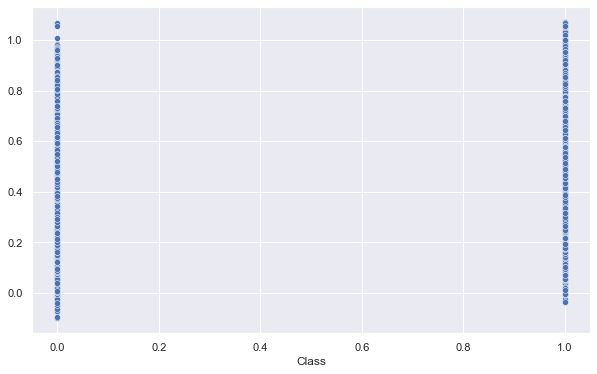

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=None, x=y_test, y=predictions)

** Model evaluation **

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4370474428186177
MSE: 0.21851181521099133
RMSE: 0.4674524737457182


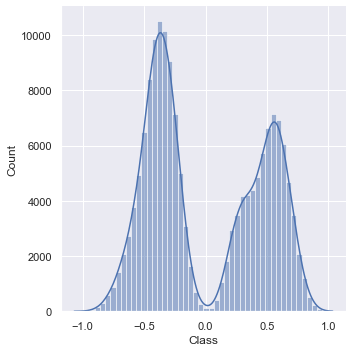

In [49]:
sns.displot(data=None, x=y_test - predictions, kde=True, bins=50)

In [50]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Time,2.686665e-04
Length,4.145456e-04
DayOfWeek,-7.028923e-03
Airline_9E,2.201636e+08
Airline_AA,2.201636e+08
...,...
AirportTo_VPS,-7.308588e+06
AirportTo_WRG,-7.308588e+06
AirportTo_XNA,-7.308588e+06
AirportTo_YAK,-7.308588e+06


____
## Logistic Regression
____

** Setup testing/training data for the linear regression model **

In [51]:
x = df.drop(['Flight', 'Class'], axis=1)
y = df['Class']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

** Training the data **

In [53]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

** Predicting the testing data **

In [54]:
predictions = logmodel.predict(x_test)

** Model evaluation **

In [55]:
metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.6334705195762115

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70    119877
           1       0.63      0.48      0.54     95876

    accuracy                           0.64    215753
   macro avg       0.64      0.63      0.62    215753
weighted avg       0.64      0.64      0.63    215753



In [57]:
print(confusion_matrix(y_test, predictions))

[[92343 27534]
 [49758 46118]]
